In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from seaborn import distplot as SB
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
matplotlib_axes_logger.setLevel('ERROR')

In [3]:
data = pd.read_csv("C:/Users/LoadinG/Desktop/Data ML/Customer_Data.csv")

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


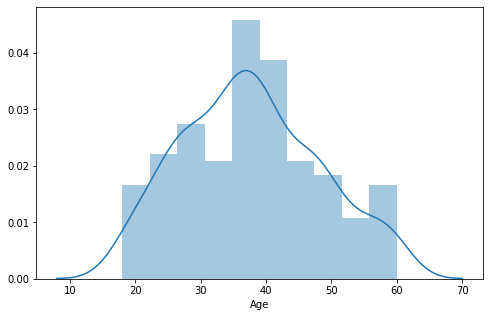

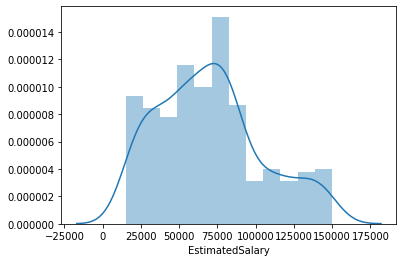

In [9]:
plt.subplots(figsize=(8,5))
plt.show(SB(data["Age"]))
plt.show(SB(data["EstimatedSalary"]))

In [117]:
features = data[["Age","EstimatedSalary"]].values
target = data["Purchased"].values

In [118]:
features.shape

(400, 2)

In [15]:
target.shape

(400, 1)

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.25, random_state = 1)

In [132]:
X_train.shape

(300, 2)

In [133]:
X_test.shape

(100, 2)

In [134]:
SC = StandardScaler()

In [135]:
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [136]:
svm = SVC(C = 2)

In [137]:
svm.fit(X_train,Y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [138]:
Y_pred = svm.predict(X_test)

In [139]:
metrics.confusion_matrix(Y_test, Y_pred)

array([[49,  9],
       [ 3, 39]], dtype=int64)

In [140]:
metrics.accuracy_score(Y_test,Y_pred)*100

88.0

In [141]:
X = np.arange(start = X_train[:,0].min() - 1 , stop = X_train[:,0].max() + 1 , step = 0.01)
Y = np.arange(start = X_train[:,1].min() - 1 , stop = X_train[:,1].max() + 1 , step = 0.01)

In [142]:
XX, YY = np.meshgrid(X,Y)

In [143]:
input_arr = np.array([XX.ravel(), YY.ravel()]).T
labels = svm.predict(input_arr).reshape(XX.shape)

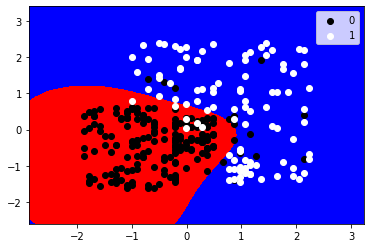

In [152]:
plt.contourf(XX,YY,labels, cmap = ListedColormap(("red","blue")))
for i,j in enumerate(np.unique(Y_train)):
    plt.scatter(X_train[Y_train == j,0],X_train[Y_train == j,1], c = ListedColormap(("black","white"))(i),label = i)
plt.legend()

In [155]:
def predict_output():
    age=int(input("Enter the age"))
    salary=int(input("Enter the salary"))
    
    X_new=np.array([[age],[salary]]).reshape(1,2)
    X_new=SC.transform(X_new)
    
    if svm.predict(X_new)[0]==0:
        return "Will not purchase"
    else:
        return "Will purchase"

In [156]:
predict_output()

Enter the age41
Enter the salary354321


'Will purchase'